In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import matplotlib.pylab as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
# this program is aming at evaluating the result with correlation coefficient
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

# Functions

In [2]:
def run_mods(name,X_train,y_train,X_test,y_test,classifiers):
    result=pd.DataFrame(columns=["Case","Algorithm","Accuracy","Cohen_Kappa","ROC_AUC_Score"])
    result.Algorithm=["KNN","Decision Tree","Logistic Regression"]
    result.Case=name
    for i,c in enumerate(classifiers):
        c.fit(X_train,y_train)
        y_pred=c.predict(X_test)
        y_pred_proba=c.predict_proba(X_test)
        result.Accuracy[i]=round(accuracy_score(y_test,y_pred),3)
        result.Cohen_Kappa[i]=round(cohen_kappa_score(y_test,y_pred),3)
        result.ROC_AUC_Score[i]=round(roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted'),3)     
    global result_table
    result_table=result_table.append(result)
    
def roc_plot(X_test,y_test,classifier,title):
    y_pred_proba=classifier.predict_proba(X_test)

    fpr = {}
    tpr = {}
    thresh ={}

    CLASSES=y_test.unique()
    CLASSES=CLASSES.tolist()
    n_class = len(CLASSES)

    le = LabelEncoder()
    y_test_encoded=le.fit_transform(y_test)


    for i in range(n_class):    
        fpr[i], tpr[i], _ = roc_curve(y_test_encoded, y_pred_proba[:,i], pos_label=i)

    code=pd.DataFrame()
    code['y_original']=y_test
    code['y_coded']=y_test_encoded
    code=code.groupby('y_original').mean()
    CLASSES=list(code.index)
    
    # plotting
    color=iter(plt.cm.rainbow(np.linspace(0,1,n_class)))

    for i in range(n_class):       
        ax.plot(fpr[i], tpr[i], linestyle='--',c=next(color),label=CLASSES[i])
    ax.title.set_text(title)
    ax.set(xlabel='False Positive Rate', ylabel='True Positive rate')
    ax.legend(loc='best')
    
def CR_plot(X_test,y_test,classifier,ax,ct):
        
    cr=classification_report(y_test,classifier.predict(X_test))
    cr=str.split(cr)
    headings=cr[0:4]
    cr=cr[4:4+5*len(y.unique())]
    
    matrix=np.array(cr).reshape(len(y.unique()),5)
    
    df=pd.DataFrame(matrix[:,1:], index=matrix[:,0], columns=headings)
    df=df.astype('float64',copy=False)
    df.support=df.support.astype(int)
      
    g=sns.heatmap(df, annot=df, vmin=0, vmax=1, ax=ax)
    for t in g.texts:
        if float(t.get_text()) > 1:     
                t.set_text(int(float(t.get_text())))
        else:
                t.set_text(round(float(t.get_text()),2))
        g.title.set_text(ct + " Classification Report")


def class_balance(X,y):
    
    classes=y.value_counts().index
    max_class=classes[0]
    classes=classes[1:]
    max_samples=y.value_counts().max()
    
    temp1=pd.concat([X,y],axis=1)
    
    resampled=pd.DataFrame(temp1[temp1[y.name]==max_class])
    
    
    for i in range(classes.size):
        temp=resample(temp1[temp1[y.name]==classes[i]],
                   replace=True,
                   n_samples=max_samples,
                   random_state=123)
        resampled=pd.concat([resampled,temp])
    
    resampled[y.name].value_counts()
    resampled = resampled.sample(frac=1).reset_index(drop=True)
    
    X_b=resampled.drop([y.name],axis=1)
    y_b=resampled[y.name]
    return(X_b,y_b)

def MAE(actual,predicted):
    return(np.mean(np.absolute(actual-predicted)))

In [3]:

data=pd.read_csv('Brain_GSE50161.csv')
data

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,959,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,...,13.170441,12.676080,14.124837,13.996436,4.913579,4.399176,3.878855,3.680103,4.726784,4.564637
126,960,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,...,13.040267,12.403316,13.978009,13.812916,5.189600,4.912618,3.764800,3.664920,4.628355,4.761351
127,961,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,...,12.825383,12.439265,14.328373,14.008693,4.931460,4.712895,3.913637,3.700964,4.764693,4.834952
128,962,pilocytic_astrocytoma,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,...,13.116581,12.657967,14.390346,14.194904,4.871092,4.739400,3.782980,3.920363,4.665584,4.613326


In [4]:
print(data['type'].value_counts())

ependymoma               46
glioblastoma             34
medulloblastoma          22
pilocytic_astrocytoma    15
normal                   13
Name: type, dtype: int64


How to try imbalance data

1. Up-sample Minority Class
Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.

There are several heuristics for doing so, but the most common way is to simply resample with replacement.

First, we'll import the resampling module from Scikit-Learn:

Next, we'll create a new DataFrame with an up-sampled minority class. Here are the steps:

First, we'll separate observations from each class into different DataFrames.
Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class.
Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

Here the ependymoma 46,glioblastoma 34 ,medulloblastoma 22 ,pilocytic_astrocytoma 15 and normai is 13.

# Imbalace

In [5]:
from sklearn.utils import resample
#Upsampling all the minorities classes to the equal
#value of the majority class i.e. sample ='386'

data_class1 = resample(data[data['type']=='ependymoma'],
               replace=True,
               n_samples=46,
               random_state=35)

data_class2 = resample(data[data['type']=='glioblastoma'],
               replace=True,
               n_samples=46,
               random_state=34)
data_class3 = resample(data[data['type']=='medulloblastoma'],
               replace=True,
               n_samples=46,
               random_state=35)
data_class4 = resample(data[data['type']=='pilocytic_astrocytoma'],
               replace=True,
               n_samples=46,
               random_state=35)
data_class5 = resample(data[data['type']=='normal'],
               replace=True,
               n_samples=46,
               random_state=13)

data_upsampled = pd.concat([data_class1, data_class2,data_class3,data_class4,data_class5])


# Display new class counts

data_upsampled['type'].value_counts()

medulloblastoma          46
glioblastoma             46
pilocytic_astrocytoma    46
normal                   46
ependymoma               46
Name: type, dtype: int64

In [6]:
## some technique to solve the type imbalance problem present in 
##the database, and evaluate the performance
features = data.columns[:54677] 
X = data_upsampled.drop(['type'],axis=1)
labels = data.columns[1]
y = data_upsampled['type'].values

# Apply Decision tree algorithem(balance database)

In [7]:
## balanced the unbalanced data to raise the accuracy rate.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
##Decision Tree
tree = DecisionTreeClassifier() # decision tree algorithm
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.') 
print(f'Model Accuracy: {tree.score(X_train, y_train)}')

Decision tree has 9 nodes with maximum depth 4.
Model Accuracy: 1.0


In [10]:
y_pred = tree.predict(X_test) 
print(classification_report(y_test,y_pred))

                       precision    recall  f1-score   support

           ependymoma       1.00      1.00      1.00         8
         glioblastoma       1.00      1.00      1.00         9
      medulloblastoma       1.00      0.88      0.94        17
               normal       1.00      1.00      1.00        11
pilocytic_astrocytoma       0.87      1.00      0.93        13

             accuracy                           0.97        58
            macro avg       0.97      0.98      0.97        58
         weighted avg       0.97      0.97      0.97        58



Here, from the visualizing the unseen data of decision tree we see that the accuracy for the given data is 97% perfect which is very high. This prediction is before optimizing the data, now next we will optimize the data and check the result.

Decision tree(imbalace data)  before optimiation

In [11]:
#Separating independant variable and dependent variable("Flow Pattern")
X = data.drop(['type'], axis=1)
y = data['type']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(130, 54676)
(130,)


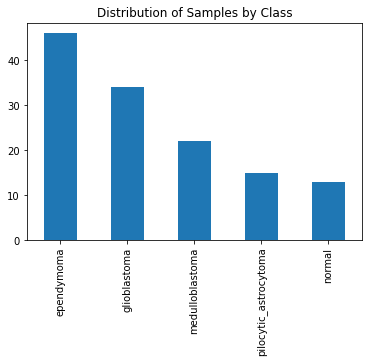

In [12]:
data['type'].value_counts().plot(kind='bar', title='Distribution of Samples by Class');

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
tree = DecisionTreeClassifier() # decision tree algorithm
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.') 
print(f'Model Accuracy: {tree.score(X_train, y_train)}')

Decision tree has 9 nodes with maximum depth 4.
Model Accuracy: 1.0


In [16]:
y_pred = tree.predict(X_test) 
print(classification_report(y_test,y_pred))

                       precision    recall  f1-score   support

           ependymoma       1.00      0.86      0.92        14
         glioblastoma       0.73      1.00      0.84         8
      medulloblastoma       1.00      0.86      0.92         7
               normal       1.00      1.00      1.00         1
pilocytic_astrocytoma       1.00      1.00      1.00         3

             accuracy                           0.91        33
            macro avg       0.95      0.94      0.94        33
         weighted avg       0.93      0.91      0.91        33



Decesion tree optimization

In [17]:
param_grid = { 'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [2, 20, 50], 
               'max_leaf_nodes': [5, 9, 15]}
gs_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gs_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': [5, 9, 15],
                         'min_samples_leaf': [2, 20, 50]})

In [18]:
print(f'The best model is: \n{gs_dt.best_estimator_}')

The best model is: 
DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, min_samples_leaf=2)


In [19]:
tree_opt = gs_dt.best_estimator_
print(f'Decision tree has {tree_opt.tree_.node_count} nodes with maximum depth {tree_opt.tree_.max_depth}.') 
print(f'Model Accuracy: {tree_opt.score(X_train, y_train)}')

Decision tree has 9 nodes with maximum depth 4.
Model Accuracy: 1.0


In [20]:
gs_dt.best_estimator_

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, min_samples_leaf=2)

In [21]:
gs_dt.best_score_

0.9694736842105263

In [22]:
y_pred = tree_opt.predict(X_test) 
print(classification_report(y_test,y_pred))

                       precision    recall  f1-score   support

           ependymoma       1.00      0.86      0.92        14
         glioblastoma       0.73      1.00      0.84         8
      medulloblastoma       1.00      0.86      0.92         7
               normal       0.00      0.00      0.00         1
pilocytic_astrocytoma       0.67      0.67      0.67         3

             accuracy                           0.85        33
            macro avg       0.68      0.68      0.67        33
         weighted avg       0.87      0.85      0.85        33



# Random Forest Regressor

In [37]:
data=pd.read_csv('Brain_GSE50161.csv')
data.head(5)



,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


In [42]:
#Separating independant variable and dependent variable
##Feature and label determination
X=data.drop(['type'],axis=1)
y=data['type']
#Scaling X data
from sklearn.model_selection import train_test_split
# Splitting the dataset to Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


(91, 54676)
(91,)
(39, 54676)
(39,)


In [45]:
from sklearn import ensemble
rvc=ensemble.RandomForestClassifier(n_estimators=100)


rvc.fit(X_train,y_train)

rvc.score(X_test,y_test)


0.9487179487179487

Logistic Regression analyses

In [47]:
LGR=LogisticRegression()
LGR.fit(X_train,y_train)
LGR.score(X_test,y_test)

C:\Users\pushp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [48]:
y_pred = LGR.predict(X_test) 
print(classification_report(y_test,y_pred))

                       precision    recall  f1-score   support

           ependymoma       1.00      1.00      1.00        15
         glioblastoma       1.00      1.00      1.00        12
      medulloblastoma       1.00      1.00      1.00         6
               normal       1.00      1.00      1.00         2
pilocytic_astrocytoma       1.00      1.00      1.00         4

             accuracy                           1.00        39
            macro avg       1.00      1.00      1.00        39
         weighted avg       1.00      1.00      1.00        39



In the above RandomForest regressor is 94% and logistic regression is 1 g  both accuracy score was good.when comparing Logistic regeression classifier better than to random forest regressior.so we can say that LogisticRegession classiier is good perfomance model.

# Support vector machine

In [24]:
data=pd.read_csv('Brain_GSE50161.csv')
data.head(4)

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275


In [25]:
#Separating independant variable and dependent variable
##Feature and label determination
X=data.drop(['type'],axis=1)
y=data['type']
print(X.shape)
print(y.shape)

(130, 54676)
(130,)


In [26]:
#Scaling X data
from sklearn.model_selection import train_test_split
# Splitting the dataset to Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


(91, 54676)
(91,)
(39, 54676)
(39,)


In [27]:
from sklearn import svm

clf = svm.SVC()

clf.fit(X_train,y_train)

predicted_labels = clf.predict(X_test)

from sklearn.metrics import confusion_matrix


def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print ("    " + empty_cell,)
    for label in labels:
        print ("%{0}s".format(columnwidth) % label,)
    print
    # Print rows
    for i, label1 in enumerate(labels):
        print ("    %{0}s".format(columnwidth) % label1,)
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print (cell,)
        print

conf = confusion_matrix(y_test, predicted_labels)

In [28]:
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

print('FP classification accuracy = %f' % accuracy(conf))

FP classification accuracy = 0.871795


In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
print ('Accuracy:', accuracy_score(y_test, predicted_labels))
print ('F1 score:', f1_score(y_test, predicted_labels,average='weighted'))
print ('Recall:', recall_score(y_test, predicted_labels,
                              average='weighted'))
print ('Precision:', precision_score(y_test, predicted_labels,
                                    average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, predicted_labels))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predicted_labels))

Accuracy: 0.8717948717948718
F1 score: 0.8341290893015031
Recall: 0.8717948717948718
Precision: 0.8582202111613876

 clasification report:
                        precision    recall  f1-score   support

           ependymoma       1.00      1.00      1.00        15
         glioblastoma       0.71      1.00      0.83        12
      medulloblastoma       1.00      1.00      1.00         6
               normal       0.00      0.00      0.00         2
pilocytic_astrocytoma       1.00      0.25      0.40         4

             accuracy                           0.87        39
            macro avg       0.74      0.65      0.65        39
         weighted avg       0.86      0.87      0.83        39


 confussion matrix:
 [[15  0  0  0  0]
 [ 0 12  0  0  0]
 [ 0  0  6  0  0]
 [ 0  2  0  0  0]
 [ 0  3  0  0  1]]


C:\Users\pushp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pushp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In the above support vector machine the classifiction of accuracy score is 87% in this algroithem its not good model.
Lets apply mulilayer perception.

# Multilayer peception

In [31]:
#Separating independant variable and dependent variable
##Feature and label determination
X=data.drop(['type'],axis=1)
y=data['type']
print(X.shape)
print(y.shape)

(130, 54676)
(130,)


In [32]:
from sklearn.model_selection import train_test_split
# Splitting the dataset to Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
num_pixels = X_train.shape

In [33]:
clf = MLPClassifier(solver='lbfgs', alpha=.1,
                    hidden_layer_sizes=(100))
clf.fit(X_train,y_train)
conf_te = confusion_matrix(y_test, clf.predict(X_test))

def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

print('Predicted accuracy: %.3f%%' % (100*accuracy(conf_te),))

predicted_labels = clf.predict(X_test)

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print ("    " + empty_cell),
    for label in labels:
        print ("%{0}s".format(columnwidth) % label),
    print
    # Print rows
    for i, label1 in enumerate(labels):
        print ("    %{0}s".format(columnwidth) % label1),
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print (cell),
        print

conf = confusion_matrix(y_test, predicted_labels)
# then print it in a pretty way
#print_cm(conf, patterns_labels)

print('Classification accuracy = %f' % accuracy(conf))

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
print ('Accuracy:', accuracy_score(y_test, predicted_labels))
print ('F1 score:', f1_score(y_test, predicted_labels,average='weighted'))
print ('Recall:', recall_score(y_test, predicted_labels,average='weighted'))
print ('Precision:', precision_score(y_test, predicted_labels,average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, predicted_labels))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predicted_labels))

C:\Users\pushp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Predicted accuracy: 94.872%
Classification accuracy = 0.948718
Accuracy: 0.9487179487179487
F1 score: 0.9500499500499499
Recall: 0.9487179487179487
Precision: 0.9615384615384616

 clasification report:
                        precision    recall  f1-score   support

           ependymoma       1.00      1.00      1.00        15
         glioblastoma       1.00      0.83      0.91        12
      medulloblastoma       0.75      1.00      0.86         6
               normal       1.00      1.00      1.00         2
pilocytic_astrocytoma       1.00      1.00      1.00         4

             accuracy                           0.95        39
            macro avg       0.95      0.97      0.95        39
         weighted avg       0.96      0.95      0.95        39


 confussion matrix:
 [[15  0  0  0  0]
 [ 0 10  2  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  4]]


In the  above unseen the data of multilayer peception classification of the accuacy scoe is 87% and when compae suppot vecto machine algoithem accuacy scoe is similat to same.In conculsion both algorithem accuacy scores are same looks like its not good perfomace.